In [1]:
import tensorflow as tf
if tf.test.gpu_device_name():
   print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
   print("Please install GPU version of TF")

Default GPU Device: /device:GPU:0


In [2]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np
import glob 
from sklearn.preprocessing import LabelEncoder
# from google.colab import drive
# drive.mount('/content/drive')

train_images = []
test_images = []
val_images = []
train_labels = []
test_labels = []
val_labels = [] 

files1 = glob.glob("/home/user/Documents/Db-Stroke-Split/Normal-rgb-named/Split_1_Norm_Train/*.jpg")
files2 = glob.glob("/home/user/Documents/Db-Stroke-Split/Normal-rgb-named/Split_1_Norm_Test/*.jpg")
files3 = glob.glob("/home/user/Documents/Db-Stroke-Split/Normal-rgb-named/Split_1_Norm_Valid/*.jpg") 

files4 = glob.glob("/home/user/Documents/Db-Stroke-Split/Hemorrhage-rgb-named/Split_1_Hem_Train/*.jpg") 
files5 = glob.glob("/home/user/Documents/Db-Stroke-Split/Hemorrhage-rgb-named/Split_1_Hem_Test/*.jpg") 
files6 = glob.glob("/home/user/Documents/Db-Stroke-Split/Hemorrhage-rgb-named/Split_1_Hem_Valid/*.jpg")

files7 = glob.glob("/home/user/Documents/Db-Stroke-Split/Infarct-rgb-named/Split_1_Inf_Train/*.jpg") 
files8 = glob.glob("/home/user/Documents/Db-Stroke-Split/Infarct-rgb-named/Split_1_Inf_Test/*.jpg") 
files9 = glob.glob("/home/user/Documents/Db-Stroke-Split/Infarct-rgb-named/Split_1_Inf_Valid/*.jpg") 

for f1 in files1: 
    img = image.load_img(f1, target_size=(224, 224))
    img = image.img_to_array(img)
    train_images.append(img) 
    train_labels.append("N")
for f1 in files4: 
    img = image.load_img(f1, target_size=(224, 224))
    img = image.img_to_array(img)
    train_images.append(img) 
    train_labels.append("H")
for f1 in files7:
    img = image.load_img(f1, target_size=(224, 224))
    img = image.img_to_array(img) 
    train_images.append(img) 
    train_labels.append("I")

for f1 in files2:
    img = image.load_img(f1, target_size=(224, 224))
    img = image.img_to_array(img) 
    test_images.append(img) 
    test_labels.append("N")
for f1 in files5:
    img = image.load_img(f1, target_size=(224, 224))
    img = image.img_to_array(img) 
    test_images.append(img) 
    test_labels.append("H")
for f1 in files8:
    img = image.load_img(f1, target_size=(224, 224))
    img = image.img_to_array(img) 
    test_images.append(img) 
    test_labels.append("I")

for f1 in files3:
    img = image.load_img(f1, target_size=(224, 224))
    img = image.img_to_array(img) 
    val_images.append(img) 
    val_labels.append("N")
for f1 in files6:
    img = image.load_img(f1, target_size=(224, 224))
    img = image.img_to_array(img) 
    val_images.append(img) 
    val_labels.append("H")
for f1 in files9:
    img = image.load_img(f1, target_size=(224, 224))
    img = image.img_to_array(img) 
    val_images.append(img) 
    val_labels.append("I")

print(len(train_images))
print(len(test_images))
print(len(val_images))

5538
1527
1314


In [3]:
from keras.utils.np_utils import to_categorical
le = LabelEncoder()

train_labels = le.fit_transform(train_labels)
test_labels = le.fit_transform(test_labels)
val_labels = le.fit_transform(val_labels)

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)
y_val = to_categorical(val_labels)

train=np.array(train_images)
test=np.array(test_images)
val=np.array(val_images)

x_train=preprocess_input(train)
x_test=preprocess_input(test)
x_val=preprocess_input(val)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(x_val.shape)
print(y_val.shape)
print(len(y_train))
print(len(y_test))
print(len(y_val))
# y_val[400:500]

(5538, 224, 224, 3)
(5538, 3)
(1527, 224, 224, 3)
(1527, 3)
(1314, 224, 224, 3)
(1314, 3)
5538
1527
1314


In [4]:
from sklearn.utils import shuffle

x_train, y_train = shuffle(x_train, y_train)
x_test, y_test = shuffle(x_test, y_test)
x_val, y_val = shuffle(x_val, y_val)

In [5]:
from keras.layers import Flatten, Dense, BatchNormalization, Activation,Dropout
from keras import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten

model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 256)       2

In [6]:
model.add(Flatten()) 
model.add(Dense(256,activation=('relu'),input_dim=512))
#model.add(Dense(512,activation=('relu'))) 
#model.add(Dense(256,activation=('relu'))) 
model.add(Dense(128,activation=('relu')))
model.add(Dense(3, activation=('softmax')))

opt = SGD(learning_rate=0.0001, decay=1e-6, momentum=0.9)
# opt = Adam(learning_rate=0.0003, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 256)       2

In [7]:
history = model.fit(x_train, y_train, batch_size=32, epochs=20, shuffle=False, verbose=1, validation_data=(x_val, y_val))

Epoch 1/20
174/174 [==============================] - 54s 261ms/step - loss: 0.7519 - accuracy: 0.7057 - val_loss: 0.7951 - val_accuracy: 0.6697
Epoch 2/20
174/174 [==============================] - 45s 257ms/step - loss: 0.6618 - accuracy: 0.7277 - val_loss: 0.7988 - val_accuracy: 0.6834
Epoch 3/20
174/174 [==============================] - 43s 244ms/step - loss: 0.5583 - accuracy: 0.7746 - val_loss: 0.8483 - val_accuracy: 0.7024
Epoch 4/20
174/174 [==============================] - 43s 246ms/step - loss: 0.4734 - accuracy: 0.8158 - val_loss: 0.8398 - val_accuracy: 0.6880
Epoch 5/20
174/174 [==============================] - 42s 243ms/step - loss: 0.3833 - accuracy: 0.8579 - val_loss: 0.8478 - val_accuracy: 0.6903
Epoch 6/20
174/174 [==============================] - 42s 239ms/step - loss: 0.3020 - accuracy: 0.8960 - val_loss: 0.8934 - val_accuracy: 0.6842
Epoch 7/20
174/174 [==============================] - 42s 240ms/step - loss: 0.2643 - accuracy: 0.9048 - val_loss: 0.9516 - val_ac

In [8]:
# print(model.get_layer("max_pooling2d_4"))
# print(model.get_layer("conv2d_12"))
from tensorflow import keras
model.save("heatmap_model.h5")

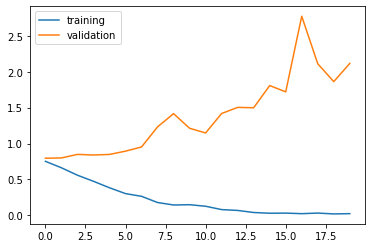

In [9]:
import matplotlib.pyplot as pyplot
pyplot.plot(history.history['loss'], label='training')
pyplot.plot(history.history['val_loss'], label='validation')
pyplot.legend()
pyplot.show()

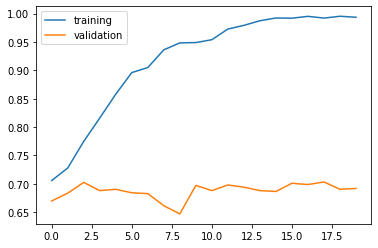

In [10]:
pyplot.plot(history.history['accuracy'], label='training')
pyplot.plot(history.history['val_accuracy'], label='validation')
pyplot.legend()
pyplot.show()

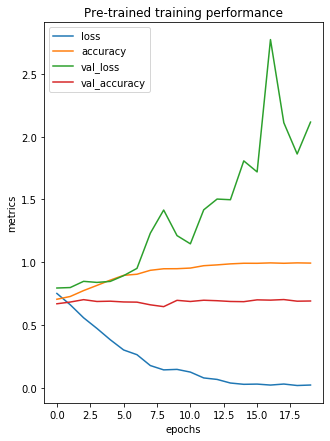

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(5,7))
plt.title("Pre-trained training performance")
plt.xlabel("epochs")
plt.ylabel("metrics")
plt.show()

In [12]:
y_pred = model.predict(x_test)

In [13]:
print(y_pred.shape)
ypred = np.argmax(y_pred, axis=1)

(1527, 3)


In [14]:
y_act = np.argmax(y_test, axis=1)

In [15]:
loss, acc = model.evaluate(x_test,y_test)
print("Testing loss : ", loss, "Testing accuracy : ", acc);

48/48 [==============================] - 3s 68ms/step - loss: 1.6143 - accuracy: 0.7570
Testing loss :  1.614267110824585 Testing accuracy :  0.7570399641990662


0 : Hemorrhage
1 : Infract
2 : Normal


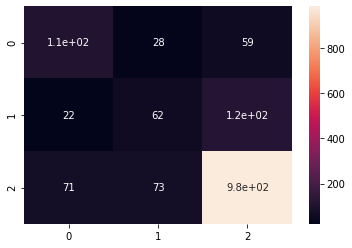

In [16]:
from sklearn import metrics
import seaborn as sns

print("0 : Hemorrhage")
print("1 : Infract")
print("2 : Normal")
cf_mat = metrics.confusion_matrix(y_act, ypred)
sns = sns.heatmap(cf_mat, annot=True)

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_act, ypred, target_names=["Hemorrhage","Infract","Normal"]))

              precision    recall  f1-score   support

  Hemorrhage       0.54      0.56      0.55       198
     Infract       0.38      0.31      0.34       202
      Normal       0.85      0.87      0.86      1127

    accuracy                           0.76      1527
   macro avg       0.59      0.58      0.58      1527
weighted avg       0.75      0.76      0.75      1527



In [18]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_act, ypred, squared=False)
print("RMSE : ",rmse)

RMSE :  0.7059481587775882


ROC curve (area = 0.72)


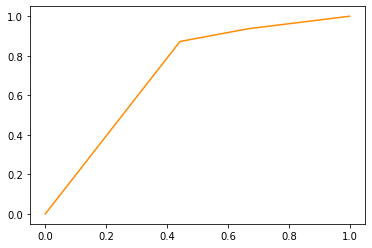

In [19]:
  from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_act, ypred, pos_label=2)
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
print('ROC curve (area = %0.2f)' % roc_auc)

In [ ]:
# last_conv_layer_name = "max_pooling2d_3"
last_conv_layer_name = "conv2d_12"
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Display
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm

def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = keras.preprocessing.image.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array

def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]
    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    last_conv_layer_output = last_conv_layer_output[0]

    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()
# img_array = x_test[50];
# imgg = np.expand_dims(img_array, axis=0)
imgg = get_img_array("./Ham.jpg", (224,224))
heatmap = make_gradcam_heatmap(imgg, model, last_conv_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.show()

In [ ]:
def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = keras.preprocessing.image.load_img(img_path)
    # img = img_path
    img = keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))
# save_and_display_gradcam(imgg[0], heatmap)
save_and_display_gradcam("./Ham.jpg", heatmap)